In [183]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random

### Задача №1

In [184]:
# Функция логистической регрессии
N = 100
x1 = np.random.uniform(low=0, high=10, size=N)
x2 = np.random.uniform(low=0, high=10, size=N)
y = 0.5*x1 + 2*x2 + 1

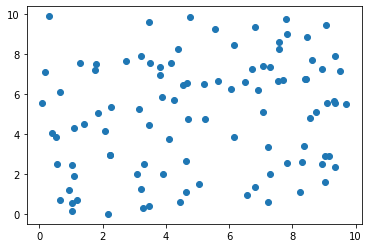

In [185]:
plt.scatter(x1, x2)
plt.show()

In [186]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

In [187]:
EPOCHS = 1000
LEARNING_RATE = 0.0001
costs = []
params = []
predictions = []
params = np.random.normal(size=(3,))

In [188]:
for _ in range(EPOCHS):
    prediction = sigmoid(params[0] + params[1] * x1 + params[2] * x2)
    predictions.append(prediction)
    
    cost = - np.sum(y * np.log(prediction) + (1-y)*np.log(1-prediction)) / (N)
    costs.append(cost)
    
    params[0] -= LEARNING_RATE * np.sum((prediction - y) / len(predictions))
    params[1] -= LEARNING_RATE * np.sum((prediction - y) * x1 / len(predictions))
    params[2] -= LEARNING_RATE * np.sum((prediction - y) * x2 / len(predictions))

<ipython-input-188-26bcbb323890>:5: RuntimeWarning: divide by zero encountered in log
  cost = - np.sum(y * np.log(prediction) + (1-y)*np.log(1-prediction)) / (N)


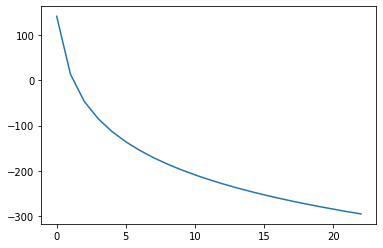

In [189]:
plt.plot(costs)

In [190]:
params

array([1.29961775, 4.9132176 , 4.60811801])

### Метод nesterov momentum

In [191]:
# В основном берется значение коэффициента сохранения равное 0.9
costs_n=[]
predictions_n = []
params_n = np.random.normal(size=(3,))
momentum = 0.9
epochs_n = 100
v0 = 0
v1 = 0
v2 = 0

In [192]:
for _ in range(epochs_n):
    old_v0 = v0
    old_v1 = v1
    old_v2 = v2
    
    prediction_n = sigmoid(params_n[0] + params_n[1] * x1 + params_n[2] * x2)
    predictions_n.append(prediction_n)
    
    cost_n = - np.sum(y * np.log(prediction_n) + (1-y)*np.log(1-prediction_n)) / (N)
    costs_n.append(cost_n)
    
    v0 = momentum * old_v0 + LEARNING_RATE * (np.sum((prediction_n - y) / len(predictions_n)))
    v1 = momentum * old_v1 + LEARNING_RATE * (np.sum((prediction_n - y) * x1 / len(predictions_n)))
    v2 = momentum * old_v2 + LEARNING_RATE * (np.sum((prediction_n - y) * x2 / len(predictions_n)))
    
    
    params_n[0] += -v0
    params_n[1] += -v1
    params_n[2] += -v2

<ipython-input-192-db372bee31a2>:9: RuntimeWarning: divide by zero encountered in log
  cost_n = - np.sum(y * np.log(prediction_n) + (1-y)*np.log(1-prediction_n)) / (N)


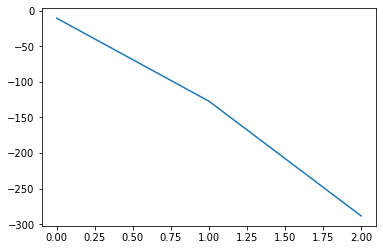

In [193]:
plt.plot(costs_n)
plt.show()

In [194]:
params_n

array([ 5.98975572, 36.95091475, 39.68630401])

### Метод rmsprop

In [195]:
# В основном берется значение коэффициента сохранения равное 0.9
costs_r=[]
epochs_r = 1000
params_r = np.random.normal(size=(3,))
grad_sqr = 0
momentum = 0.9

In [196]:
for _ in range(epochs_r):
    
    prediction_r = sigmoid(params_r[0] + params_r[1] * x1 + params_r[2] * x2)
    
    cost_r = - np.sum(y * np.log(prediction_r) + (1-y)*np.log(1-prediction_r)) / (N)
    costs_r.append(cost_r)
    
    # Находим производные
    dt0 = np.sum((prediction_r - y) / len(predictions_r))
    dt1 = np.sum((prediction_r - y) * x1 / len(predictions_r))
    dt2 = np.sum((prediction_r - y) * x2 / len(predictions_r))
    
    grad_sqr_0 = momentum * grad_sqr_0 + (1 - momentum) * dt0**2
    grad_sqr_1 = momentum * grad_sqr_1 + (1 - momentum) * dt1**2
    grad_sqr_2 = momentum * grad_sqr_2 + (1 - momentum) * dt2**2
    
    params_r[0] += -LEARNING_RATE * dt0 / (np.sqrt(grad_sqr_0) + 1e-7)
    params_r[1] += -LEARNING_RATE * dt1 / (np.sqrt(grad_sqr_1) + 1e-7)
    params_r[2] += -LEARNING_RATE * dt2 / (np.sqrt(grad_sqr_2) + 1e-7)

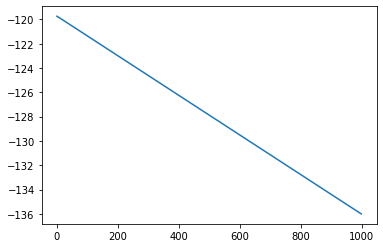

In [197]:
plt.plot(costs_r)
plt.show()

In [198]:
params_r

array([ 0.63218281, -0.48781463,  2.07829947])